<h1> Week 05 Merged Datasets for Midterm

**By:** Andrew Williams & Ben Brassette
    
**Description:** We merged our collective notebooks into this single notebook in order to leverage our analysis on transit mobility across Los Angeles. 

Section 2: Library Import

Section 3: Trasnportation Means to Work

Section 4: Census: Median Income Data Exploration

Section 5: Census: Race and Ethnicity  Data Exploration

Section 6: LA Metro and Rail Shapefiles-- All inputs are mark down. Will use as necessary or use LA Metro API. 

Section 7: Deeper Analysis

<h1> Import Libraries

Importing various libaries

In [1]:
import urllib.request, json 
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

<h1> Transportation Means to Work Data

<h2> Basics

In [2]:
#transporation means to work
means2work = gpd.read_file('Data/Means_Transpo_Work_Tract/acs2019_5yr_B08301_14000US06037185320.geojson')

In [3]:
type(means2work)

geopandas.geodataframe.GeoDataFrame

Libraries good to go, meanstwork gdp good to go.

Looking for an LA total row to drop.

In [ ]:
means2work.head(4)

In [ ]:
means2work.tail(4)

Look like row 1004 is our winner. I will drop it.

In [4]:
#dropped la city total
means2work = means2work.drop([1004])

In [5]:
means2work.tail()

,geoid,name,B08301001,"B08301001, Error",B08301002,"B08301002, Error",B08301003,"B08301003, Error",B08301004,"B08301004, Error",...,"B08301017, Error",B08301018,"B08301018, Error",B08301019,"B08301019, Error",B08301020,"B08301020, Error",B08301021,"B08301021, Error",geometry
999,14000US06037980024,"Census Tract 9800.24, Los Angeles, CA",138.0,69.0,130.0,71.0,130.0,71.0,0.0,12.0,...,12.0,0.0,12.0,0.0,12.0,0.0,12.0,4.0,6.0,"MULTIPOLYGON (((-118.51849 34.18389, -118.5184..."
1000,14000US06037980026,"Census Tract 9800.26, Los Angeles, CA",5.0,8.0,5.0,8.0,5.0,8.0,0.0,12.0,...,12.0,0.0,12.0,0.0,12.0,0.0,12.0,0.0,12.0,"MULTIPOLYGON (((-118.35173 34.28034, -118.3517..."
1001,14000US06037980028,"Census Tract 9800.28, Los Angeles, CA",0.0,12.0,0.0,12.0,0.0,12.0,0.0,12.0,...,12.0,0.0,12.0,0.0,12.0,0.0,12.0,0.0,12.0,"MULTIPOLYGON (((-118.45246 33.94315, -118.4464..."
1002,14000US06037980031,"Census Tract 9800.31, Los Angeles, CA",24.0,27.0,15.0,26.0,15.0,26.0,0.0,12.0,...,12.0,5.0,7.0,0.0,12.0,4.0,6.0,0.0,12.0,"MULTIPOLYGON (((-118.29105 33.75378, -118.2905..."
1003,14000US06037990200,"Census Tract 9902, Los Angeles, CA",0.0,12.0,0.0,12.0,0.0,12.0,0.0,12.0,...,12.0,0.0,12.0,0.0,12.0,0.0,12.0,0.0,12.0,"MULTIPOLYGON (((-118.63598 34.03255, -118.6325..."


dropped

I'm deleting my error rows and dropping the breakdown of carpooling. Will re-define my variable and test it out. 

In [6]:
columns_to_keep = ['geoid',
 'name',
 'B08301001',
 'B08301002',
 'B08301003',
 'B08301004',
 'B08301010',
 'B08301011',
 'B08301012',
 'B08301013',
 'B08301014',
 'B08301016',
 'B08301017',
 'B08301018',
 'B08301019',
 'B08301020',
 'B08301021',
 'geometry']

In [7]:
means2work = means2work [columns_to_keep]

In [8]:
means2work.sample()

,geoid,name,B08301001,B08301002,B08301003,B08301004,B08301010,B08301011,B08301012,B08301013,B08301014,B08301016,B08301017,B08301018,B08301019,B08301020,B08301021,geometry
591,14000US06037211803,"Census Tract 2118.03, Los Angeles, CA",2108.0,1649.0,1568.0,81.0,314.0,253.0,61.0,0.0,0.0,25.0,0.0,9.0,52.0,0.0,59.0,"MULTIPOLYGON (((-118.30411 34.06719, -118.3041..."


Great, columns have been dropped, but now will relabel them appropriately. 

In [9]:
#renaming columns
means2work.columns = ['geoid',
 'name',
 'Total',
 'Car, truck, or van',
 'Drove alone',
 'Carpooled',
 'Public transportation',
 'Bus',
 'Subway or elevated il',
 'Long-distance train or commuter rail',
 'Light rail, streetcar or trolley',
 'Taxicab',
 'Motorcycle',
 'Bicycle',
 'Walked',
 'Other means',
 'Worked from home',
 'geometry']

In [10]:
means2work.sample()

,geoid,name,Total,"Car, truck, or van",Drove alone,Carpooled,Public transportation,Bus,Subway or elevated il,Long-distance train or commuter rail,"Light rail, streetcar or trolley",Taxicab,Motorcycle,Bicycle,Walked,Other means,Worked from home,geometry
106,14000US06037115201,"Census Tract 1152.01, Los Angeles, CA",3867.0,3073.0,2794.0,279.0,174.0,96.0,0.0,78.0,0.0,0.0,0.0,82.0,393.0,67.0,78.0,"MULTIPOLYGON (((-118.54741 34.23922, -118.5473..."


Fantastic, columns have been re-named as seen in the sample above.

To make appropriate comparisons, will create percenates for each category.

In [11]:
means2work['Percent Car, truck, or van'] = means2work['Car, truck, or van']/means2work['Total']*100
means2work['Percent Drove alone'] = means2work['Drove alone']/means2work['Total']*100
means2work['Percent Carpooled'] = means2work['Carpooled']/means2work['Total']*100
means2work['Percent Public transportation'] = means2work['Public transportation']/means2work['Total']*100
means2work['Percent Bus'] = means2work['Bus']/means2work['Total']*100
means2work['Percent Subway or elevated il'] = means2work['Subway or elevated il']/means2work['Total']*100
means2work['Percent Long-distance train or commuter rail'] = means2work['Long-distance train or commuter rail']/means2work['Total']*100
means2work['Percent Light rail, streetcar or trolley'] = means2work['Light rail, streetcar or trolley']/means2work['Total']*100
means2work['Percent Taxicab'] = means2work['Taxicab']/means2work['Total']*100
means2work['Percent Motorcycle'] = means2work['Motorcycle']/means2work['Total']*100
means2work['Percent Bicycle'] = means2work['Bicycle']/means2work['Total']*100
means2work['Percent Walked'] = means2work['Walked']/means2work['Total']*100
means2work['Percent Other means'] = means2work['Other means']/means2work['Total']*100
means2work['Percent Worked from home'] = means2work['Worked from home']/means2work['Total']*100

In [12]:
means2work.sample()

,geoid,name,Total,"Car, truck, or van",Drove alone,Carpooled,Public transportation,Bus,Subway or elevated il,Long-distance train or commuter rail,...,Percent Bus,Percent Subway or elevated il,Percent Long-distance train or commuter rail,"Percent Light rail, streetcar or trolley",Percent Taxicab,Percent Motorcycle,Percent Bicycle,Percent Walked,Percent Other means,Percent Worked from home
964,14000US06037294820,"Census Tract 2948.20, Los Angeles, CA",1446.0,1163.0,1071.0,92.0,104.0,104.0,0.0,0.0,...,7.192254,0.0,0.0,0.0,0.0,1.728907,1.521438,4.840941,1.936376,2.351314


Lovely, percent columns have been added to my dataset.

<h1>Census: Median Income Data Exploration

## Load Census data

I will load one Census data table:

Table B19013: Median Household Income in the Last 12 Months

In [89]:
# loading the three data files

gdf_income = gpd.read_file('Data/income/acs2019_5yr_B19013_income.geojson')

## Begin to look at the data
Since there are three different datasets, we will need to run commands for each one. 

In [92]:
gdf_income.shape

(1005, 5)

In [93]:
gdf_income.head()

,geoid,name,B19013001,"B19013001, Error",geometry
0,14000US06037101110,"Census Tract 1011.10, Los Angeles, CA",63534.0,16806.0,"MULTIPOLYGON (((-118.30229 34.25870, -118.3009..."
1,14000US06037101122,"Census Tract 1011.22, Los Angeles, CA",90389.0,9796.0,"MULTIPOLYGON (((-118.30334 34.27371, -118.3033..."
2,14000US06037101210,"Census Tract 1012.10, Los Angeles, CA",44083.0,9483.0,"MULTIPOLYGON (((-118.29945 34.25598, -118.2979..."
3,14000US06037101220,"Census Tract 1012.20, Los Angeles, CA",43713.0,4639.0,"MULTIPOLYGON (((-118.28593 34.25227, -118.2859..."
4,14000US06037101300,"Census Tract 1013, Los Angeles, CA",81776.0,11857.0,"MULTIPOLYGON (((-118.27822 34.25068, -118.2782..."


In [94]:
# columns to keep
columns_to_keep = ['geoid',
 'name',
 'B19013001',
 'geometry']

In [95]:
# redefine gdf with only columns to keep
gdf_income = gdf_income[columns_to_keep]

In [96]:
# check the slimmed down gdf
gdf_income.head()

,geoid,name,B19013001,geometry
0,14000US06037101110,"Census Tract 1011.10, Los Angeles, CA",63534.0,"MULTIPOLYGON (((-118.30229 34.25870, -118.3009..."
1,14000US06037101122,"Census Tract 1011.22, Los Angeles, CA",90389.0,"MULTIPOLYGON (((-118.30334 34.27371, -118.3033..."
2,14000US06037101210,"Census Tract 1012.10, Los Angeles, CA",44083.0,"MULTIPOLYGON (((-118.29945 34.25598, -118.2979..."
3,14000US06037101220,"Census Tract 1012.20, Los Angeles, CA",43713.0,"MULTIPOLYGON (((-118.28593 34.25227, -118.2859..."
4,14000US06037101300,"Census Tract 1013, Los Angeles, CA",81776.0,"MULTIPOLYGON (((-118.27822 34.25068, -118.2782..."


In [97]:
gdf_income.columns = ['geoid',
 'name',
 'Median Income',
 'geometry']

In [98]:
gdf_income.head()

,geoid,name,Median Income,geometry
0,14000US06037101110,"Census Tract 1011.10, Los Angeles, CA",63534.0,"MULTIPOLYGON (((-118.30229 34.25870, -118.3009..."
1,14000US06037101122,"Census Tract 1011.22, Los Angeles, CA",90389.0,"MULTIPOLYGON (((-118.30334 34.27371, -118.3033..."
2,14000US06037101210,"Census Tract 1012.10, Los Angeles, CA",44083.0,"MULTIPOLYGON (((-118.29945 34.25598, -118.2979..."
3,14000US06037101220,"Census Tract 1012.20, Los Angeles, CA",43713.0,"MULTIPOLYGON (((-118.28593 34.25227, -118.2859..."
4,14000US06037101300,"Census Tract 1013, Los Angeles, CA",81776.0,"MULTIPOLYGON (((-118.27822 34.25068, -118.2782..."


In [99]:
gdf_income

,geoid,name,Median Income,geometry
0,14000US06037101110,"Census Tract 1011.10, Los Angeles, CA",63534.0,"MULTIPOLYGON (((-118.30229 34.25870, -118.3009..."
1,14000US06037101122,"Census Tract 1011.22, Los Angeles, CA",90389.0,"MULTIPOLYGON (((-118.30334 34.27371, -118.3033..."
2,14000US06037101210,"Census Tract 1012.10, Los Angeles, CA",44083.0,"MULTIPOLYGON (((-118.29945 34.25598, -118.2979..."
3,14000US06037101220,"Census Tract 1012.20, Los Angeles, CA",43713.0,"MULTIPOLYGON (((-118.28593 34.25227, -118.2859..."
4,14000US06037101300,"Census Tract 1013, Los Angeles, CA",81776.0,"MULTIPOLYGON (((-118.27822 34.25068, -118.2782..."
...,...,...,...,...
1000,14000US06037980026,"Census Tract 9800.26, Los Angeles, CA",NaN,"MULTIPOLYGON (((-118.35173 34.28034, -118.3517..."
1001,14000US06037980028,"Census Tract 9800.28, Los Angeles, CA",NaN,"MULTIPOLYGON (((-118.45246 33.94315, -118.4464..."
1002,14000US06037980031,"Census Tract 9800.31, Los Angeles, CA",NaN,"MULTIPOLYGON (((-118.29105 33.75378, -118.2905..."
1003,14000US06037990200,"Census Tract 9902, Los Angeles, CA",NaN,"MULTIPOLYGON (((-118.63598 34.03255, -118.6325..."


# Census: Race and Ethnicity Data Exploration
Ben Bressette

I am using this assignment opportunity to rework some of the things in this file that didn't work properly and I didn't have the patience to fix :)

Namely, I am going to narrow it down to one dataset, and then actually go through and clean the data (that is, rename the columns). 

--

Our group project is a comparison of accessibility and mobility in Los Angeles neighborhoods. We seek to grasp how different neighborhoods and demographic compositions experience daily life in their own neighborhood and the broader city. We will be using data from the American Community Survey, LA Metro, the City of LA, LA Times, and the Bureau of Transportation Statistics.

My partner, Andrew Williams, looked at a variety of data that explores the means of transportation to work at the census tract level. I will analyze race, income, and density at the same level across the City of LA. 

## Load Census data

I will load one Census data table:

Table B03002: Hispanic or Latino Origin by Race

In [111]:
# loading the three data files

gdf_race = gpd.read_file('Data/race/acs2019_5yr_B03002_raceethnicity.geojson')

## Begin to look at the data
Since there are three different datasets, we will need to run commands for each one. 

In [112]:
gdf_race.shape

(1005, 45)

In [113]:
# columns to keep
columns_to_keep = ['geoid',
 'name',
 'B03002001',
 'B03002002',
 'B03002003',
 'B03002004',
 'B03002005',
 'B03002006',
 'B03002007',
 'B03002008',
 'B03002009',
 'B03002010',
 'B03002011',
 'B03002012',
 'B03002013',
 'B03002014',
 'B03002015',
 'B03002016',
 'B03002017',
 'B03002018',
 'B03002019',
 'B03002020',
 'B03002021',
 'geometry']

In [114]:
# redefine gdf with only columns to keep
gdf_race = gdf_race[columns_to_keep]

In [115]:
# check the slimmed down gdf
gdf_race.head()

,geoid,name,B03002001,B03002002,B03002003,B03002004,B03002005,B03002006,B03002007,B03002008,...,B03002013,B03002014,B03002015,B03002016,B03002017,B03002018,B03002019,B03002020,B03002021,geometry
0,14000US06037101110,"Census Tract 1011.10, Los Angeles, CA",4283.0,3095.0,2616.0,19.0,3.0,331.0,3.0,8.0,...,731.0,0.0,0.0,0.0,0.0,383.0,74.0,34.0,40.0,"MULTIPOLYGON (((-118.30229 34.25870, -118.3009..."
1,14000US06037101122,"Census Tract 1011.22, Los Angeles, CA",3405.0,3258.0,2882.0,74.0,15.0,220.0,0.0,0.0,...,99.0,0.0,0.0,0.0,0.0,48.0,0.0,0.0,0.0,"MULTIPOLYGON (((-118.30334 34.27371, -118.3033..."
2,14000US06037101210,"Census Tract 1012.10, Los Angeles, CA",6347.0,3731.0,2986.0,198.0,0.0,486.0,0.0,47.0,...,1661.0,0.0,0.0,0.0,0.0,874.0,81.0,48.0,33.0,"MULTIPOLYGON (((-118.29945 34.25598, -118.2979..."
3,14000US06037101220,"Census Tract 1012.20, Los Angeles, CA",3702.0,2338.0,1812.0,87.0,0.0,341.0,0.0,0.0,...,822.0,0.0,0.0,0.0,0.0,497.0,45.0,11.0,34.0,"MULTIPOLYGON (((-118.28593 34.25227, -118.2859..."
4,14000US06037101300,"Census Tract 1013, Los Angeles, CA",3884.0,3587.0,3126.0,205.0,0.0,194.0,0.0,0.0,...,224.0,0.0,0.0,0.0,0.0,45.0,28.0,28.0,0.0,"MULTIPOLYGON (((-118.27822 34.25068, -118.2782..."


In [116]:
gdf_race.columns = ['geoid',
 'name',
 'Total',
 'Not Hispanic or Latino',
 'N_White',
 'N_Black',
 'N_Native',
 'N_Asian',
 'N_Native Hawaiian',
 'N_Some other race alone',
 'N_Two or more races',
 'N_Two races including some other race',
 'N_Two races excluding some other race, and three or more races',
 'Hispanic or Latino',
 'H_White',
 'H_Black',
 'H_Native',
 'H_Asian',
 'H_Native Hawaiian',
 'H_Some other race alone',
 'H_Two or more races',
 'H_Two races including some other race',
 'H_Two races excluding some other race, and three or more races',
 'geometry']

In [ ]:
gdf_race.head()

In [117]:
gdf_race['N_WhitePercentage']=round(((gdf_race['N_White']/ gdf_race['Total'])*100),2)
gdf_race['N_BlacPercentage']=round(((gdf_race['N_Black']/ gdf_race['Total'])*100),2)
gdf_race['N_NativePercentage']=round(((gdf_race['N_Native']/ gdf_race['Total'])*100),2)
gdf_race['N_AsianPercentage']=round(((gdf_race['N_Asian']/ gdf_race['Total'])*100),2)
gdf_race['N_HawaiianPercentage']=round(((gdf_race['N_Native Hawaiian']/ gdf_race['Total'])*100),2)
gdf_race['N_OtherPercentage']=round(((gdf_race['N_Some other race alone']/ gdf_race['Total'])*100),2)
gdf_race['N_TwoPlusPercentage']=round(((gdf_race['N_Two or more races']/ gdf_race['Total'])*100),2)
gdf_race['N_TwoInclOtherPercentage']=round(((gdf_race['N_Two races including some other race']/ gdf_race['Total'])*100),2)
gdf_race['N_TwoPlusThreePlusPercentage']=round(((gdf_race['N_Two races excluding some other race, and three or more races']/ gdf_race['Total'])*100),2)

gdf_race['H_WhitePercentage']=round(((gdf_race['H_White']/ gdf_race['Total'])*100),2)
gdf_race['H_BlacPercentage']=round(((gdf_race['H_Black']/ gdf_race['Total'])*100),2)
gdf_race['H_NativePercentage']=round(((gdf_race['H_Native']/ gdf_race['Total'])*100),2)
gdf_race['H_AsianPercentage']=round(((gdf_race['H_Asian']/ gdf_race['Total'])*100),2)
gdf_race['H_HawaiianPercentage']=round(((gdf_race['H_Native Hawaiian']/ gdf_race['Total'])*100),2)
gdf_race['H_OtherPercentage']=round(((gdf_race['H_Some other race alone']/ gdf_race['Total'])*100),2)
gdf_race['H_TwoPlusPercentage']=round(((gdf_race['H_Two or more races']/ gdf_race['Total'])*100),2)
gdf_race['H_TwoInclOtherPercentage']=round(((gdf_race['H_Two races including some other race']/ gdf_race['Total'])*100),2)
gdf_race['H_TwoPlusThreePlusPercentage']=round(((gdf_race['H_Two races excluding some other race, and three or more races']/ gdf_race['Total'])*100),2)


gdf_race.head()

,geoid,name,Total,Not Hispanic or Latino,N_White,N_Black,N_Native,N_Asian,N_Native Hawaiian,N_Some other race alone,...,N_TwoPlusThreePlusPercentage,H_WhitePercentage,H_BlacPercentage,H_NativePercentage,H_AsianPercentage,H_HawaiianPercentage,H_OtherPercentage,H_TwoPlusPercentage,H_TwoInclOtherPercentage,H_TwoPlusThreePlusPercentage
0,14000US06037101110,"Census Tract 1011.10, Los Angeles, CA",4283.0,3095.0,2616.0,19.0,3.0,331.0,3.0,8.0,...,2.69,17.07,0.0,0.0,0.0,0.0,8.94,1.73,0.79,0.93
1,14000US06037101122,"Census Tract 1011.22, Los Angeles, CA",3405.0,3258.0,2882.0,74.0,15.0,220.0,0.0,0.0,...,1.97,2.91,0.0,0.0,0.0,0.0,1.41,0.00,0.00,0.00
2,14000US06037101210,"Census Tract 1012.10, Los Angeles, CA",6347.0,3731.0,2986.0,198.0,0.0,486.0,0.0,47.0,...,0.22,26.17,0.0,0.0,0.0,0.0,13.77,1.28,0.76,0.52
3,14000US06037101220,"Census Tract 1012.20, Los Angeles, CA",3702.0,2338.0,1812.0,87.0,0.0,341.0,0.0,0.0,...,2.65,22.20,0.0,0.0,0.0,0.0,13.43,1.22,0.30,0.92
4,14000US06037101300,"Census Tract 1013, Los Angeles, CA",3884.0,3587.0,3126.0,205.0,0.0,194.0,0.0,0.0,...,1.60,5.77,0.0,0.0,0.0,0.0,1.16,0.72,0.72,0.00


In [118]:
gdf_race

,geoid,name,Total,Not Hispanic or Latino,N_White,N_Black,N_Native,N_Asian,N_Native Hawaiian,N_Some other race alone,...,N_TwoPlusThreePlusPercentage,H_WhitePercentage,H_BlacPercentage,H_NativePercentage,H_AsianPercentage,H_HawaiianPercentage,H_OtherPercentage,H_TwoPlusPercentage,H_TwoInclOtherPercentage,H_TwoPlusThreePlusPercentage
0,14000US06037101110,"Census Tract 1011.10, Los Angeles, CA",4283.0,3095.0,2616.0,19.0,3.0,331.0,3.0,8.0,...,2.69,17.07,0.00,0.00,0.00,0.00,8.94,1.73,0.79,0.93
1,14000US06037101122,"Census Tract 1011.22, Los Angeles, CA",3405.0,3258.0,2882.0,74.0,15.0,220.0,0.0,0.0,...,1.97,2.91,0.00,0.00,0.00,0.00,1.41,0.00,0.00,0.00
2,14000US06037101210,"Census Tract 1012.10, Los Angeles, CA",6347.0,3731.0,2986.0,198.0,0.0,486.0,0.0,47.0,...,0.22,26.17,0.00,0.00,0.00,0.00,13.77,1.28,0.76,0.52
3,14000US06037101220,"Census Tract 1012.20, Los Angeles, CA",3702.0,2338.0,1812.0,87.0,0.0,341.0,0.0,0.0,...,2.65,22.20,0.00,0.00,0.00,0.00,13.43,1.22,0.30,0.92
4,14000US06037101300,"Census Tract 1013, Los Angeles, CA",3884.0,3587.0,3126.0,205.0,0.0,194.0,0.0,0.0,...,1.60,5.77,0.00,0.00,0.00,0.00,1.16,0.72,0.72,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1000,14000US06037980026,"Census Tract 9800.26, Los Angeles, CA",26.0,19.0,7.0,11.0,0.0,0.0,0.0,0.0,...,3.85,11.54,0.00,0.00,0.00,0.00,15.38,0.00,0.00,0.00
1001,14000US06037980028,"Census Tract 9800.28, Los Angeles, CA",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1002,14000US06037980031,"Census Tract 9800.31, Los Angeles, CA",1175.0,788.0,393.0,232.0,26.0,36.0,24.0,25.0,...,2.38,20.68,1.19,0.94,1.19,0.00,6.21,2.72,2.30,0.43
1003,14000US06037990200,"Census Tract 9902, Los Angeles, CA",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## What does this tell us? 
**(analysis for intial maps, but deeper analysis below)**

Not a lot -- so far. The maps produced for the race and language are the same, and the data table for geographic mobility is just what we saw when we downloaded the data from the Census. This is ok though -- not all data is going to be conclusive on its own, and we will need to combine sets, tables, and variables to reach meaningful relationships.

In [ ]:
gdf_race.geoid.head()

Again, this doesn't tell us much. It's just the geographic IDs of the observations in the Census, which are the same. 

In [ ]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [ ]:
gdf_race.sample()

In [ ]:
gdf_race.info

<h1> LA Metro Transit Consolidation: Bus & Rail

<h2> Importing Libraries and Datasets

Importing a long line of shape files from LA Metro-- Better yet, I found a combined a LA bus routes shapefile coutesy of LA GeoHub. 

In [158]:
rail_lines = gpd.read_file('Data/RailStations0715/Stations_All_0715.shp')

mbus_lines = gpd.read_file('Data/metro_bus_lines/Metro_Bus_Lines.shp')

Shape files are ready for exploration now. 

<h2> Metro Bus Lines

Ensuring datatype

In [159]:
type(mbus_lines)

geopandas.geodataframe.GeoDataFrame

bmus_line is a gpd.

I want to see the kinds of data within this dataset

In [160]:
mbus_lines.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 811 entries, 0 to 810
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   OBJECTID    811 non-null    int64   
 1   VAR_ROUTE   786 non-null    object  
 2   VAR_IDENT   809 non-null    object  
 3   VAR_DESCR   807 non-null    object  
 4   VAR_DIREC   811 non-null    int64   
 5   MetroCateg  811 non-null    object  
 6   MetroBusTy  811 non-null    object  
 7   RouteNumbe  811 non-null    int64   
 8   RouteName   811 non-null    object  
 9   TOOLTIP     811 non-null    object  
 10  NLA_URL     811 non-null    object  
 11  geometry    810 non-null    geometry
dtypes: geometry(1), int64(3), object(8)
memory usage: 76.2+ KB


It appears I have a few strings, one geo, and the rest are intergers. No floats. 

I want to see the size of my dataset (rows and columns)

In [161]:
mbus_lines.shape

(811, 12)

No surprises here, list is expanisve given it contains all of LA metro's bus lines. 

Scoping out the head and tails of my data to see what the actual values are in my dataset.

In [162]:
mbus_lines.head()

,OBJECTID,VAR_ROUTE,VAR_IDENT,VAR_DESCR,VAR_DIREC,MetroCateg,MetroBusTy,RouteNumbe,RouteName,TOOLTIP,NLA_URL,geometry
0,1,60,N1,END TO END,0,ComCirc,Metro Shuttles and Circulators,603,603 Glendale-Grand Sta Via San Fernando-Rampar...,603 Glendale-Grand Sta Via San Fernando-Rampar...,http://www.metro.net/riding/maps/?nla_target=1...,"LINESTRING (-118.26462 34.03322, -118.26432 34..."
1,2,60,S1,END TO END,1,ComCirc,Metro Shuttles and Circulators,603,603 Glendale-Grand Sta Via San Fernando-Rampar...,603 Glendale-Grand Sta Via San Fernando-Rampar...,http://www.metro.net/riding/maps/?nla_target=1...,"LINESTRING (-118.26088 34.14528, -118.26088 34..."
2,3,60,N1,END TO END,0,ComCirc,Metro Shuttles and Circulators,605,605 Lac+usc Med Ctr Out Patient - Olympic Bl S...,605 Lac+usc Med Ctr Out Patient - Olympic Bl S...,http://www.metro.net/riding/maps/?nla_target=1...,"LINESTRING (-118.21045 34.01992, -118.21046 34..."
3,4,60,S1,END TO END,1,ComCirc,Metro Shuttles and Circulators,605,605 Lac+usc Med Ctr Out Patient - Olympic Bl S...,605 Lac+usc Med Ctr Out Patient - Olympic Bl S...,http://www.metro.net/riding/maps/?nla_target=1...,"LINESTRING (-118.20655 34.05874, -118.20655 34..."
4,5,60,A2,New Clockwise Loop,8,ComCirc,Metro Shuttles and Circulators,607,607 Windsor Hills - Inglewood Shuttle,607 Windsor Hills - Inglewood Shuttle\nType: M...,http://www.metro.net/riding/maps/?nla_target=1...,"LINESTRING (-118.35281 33.95983, -118.35282 33..."


Tons of useful information on metro bus routes. I will eventually want to seperate the MetroCateg so I can plot different bus line systems.

I would like to see my bus lines

In [163]:
mbus_lines['VAR_ROUTE'].value_counts()

16     54
23     43
15     43
7      36
5      34
3      33
21     30
1      30
9      30
11     29
26     28
20     27
8      26
10     23
6      23
24     22
4      21
25     21
22     18
2      16
12     14
75     12
18     12
72     11
70     10
19     10
74      9
29      8
48      8
76      8
17      8
68      7
71      6
62      6
73      6
60      5
46      5
53      5
64      4
91      4
61      4
90      4
44      4
78      4
27      3
55      3
34      3
66      3
77      3
45      2
57      2
79      2
13      2
901     2
Name: VAR_ROUTE, dtype: int64

Bus route numbers. Wondering what the difference between VAR_ROUTE and RouteNumbe.

I want to see if the metrocatego encompasses all the bus lines as described by LA Metro. Otherwise, I will have to upload missing bus line systems

In [164]:
mbus_lines['MetroCateg'].value_counts()

LocalNonCBD    395
LocalCBD       274
RapidBRT        81
LimExp          32
ComCirc         29
Name: MetroCateg, dtype: int64

Fantastic. This list has all 5 bus line systems that have corresponding shapefiles on LA Metro's website. 

Quick plot to see bus system appatarus.

mbus_lines.plot(figsize=(20,15))

LA Metro bus sytem seems widespread. Will be beneficial to create sub-datasets for each type of bus (cbd, non cbd, etc.)

<h2> Local CBD Bus Lines

A couple steps in one since I'm doing this for five different subcomponents for this dataset.

In [165]:
#pulling subset of data from mbus_lines-- the local CBD routes and creating a variable
local_cbd = mbus_lines[mbus_lines.MetroCateg == 'LocalCBD']
#testing new variable
local_cbd

,OBJECTID,VAR_ROUTE,VAR_IDENT,VAR_DESCR,VAR_DIREC,MetroCateg,MetroBusTy,RouteNumbe,RouteName,TOOLTIP,NLA_URL,geometry
61,62,None,E05,Short Line at GLEMNT,2,LocalCBD,Metro Local and Limited,2,2 Downtown LA - Pacific Palisades Via Sunset Bl,2 Downtown LA - Pacific Palisades Via Sunset B...,http://www.metro.net/riding/maps/?nla_target=1...,"LINESTRING (-118.29122 34.09816, -118.28955 34..."
62,63,None,E1,End-End Local June 2001,2,LocalCBD,Metro Local and Limited,2,2 Downtown LA - Pacific Palisades Via Sunset Bl,2 Downtown LA - Pacific Palisades Via Sunset B...,http://www.metro.net/riding/maps/?nla_target=1...,"LINESTRING (-118.55443 34.03980, -118.55439 34..."
63,64,None,E10,LTD TO GLEMNT,2,LocalCBD,Metro Local and Limited,2,2 Downtown LA - Pacific Palisades Via Sunset Bl,2 Downtown LA - Pacific Palisades Via Sunset B...,http://www.metro.net/riding/maps/?nla_target=1...,"LINESTRING (-118.41233 34.08134, -118.41197 34..."
64,65,None,E2,End-End LTD June 2001,2,LocalCBD,Metro Local and Limited,2,2 Downtown LA - Pacific Palisades Via Sunset Bl,2 Downtown LA - Pacific Palisades Via Sunset B...,http://www.metro.net/riding/maps/?nla_target=1...,"LINESTRING (-118.41233 34.08134, -118.41197 34..."
65,66,None,E3,UCLA,2,LocalCBD,Metro Local and Limited,2,2 Downtown LA - Pacific Palisades Via Sunset Bl,2 Downtown LA - Pacific Palisades Via Sunset B...,http://www.metro.net/riding/maps/?nla_target=1...,"LINESTRING (-118.44485 34.06915, -118.44483 34..."
...,...,...,...,...,...,...,...,...,...,...,...,...
330,331,9,S4,From SYLMET,1,LocalCBD,Metro Local and Limited,94,94 Downtown LA - Sun Valley Via San Fernando Rd,94 Downtown LA - Sun Valley Via San Fernando R...,http://www.metro.net/riding/maps/?nla_target=1...,"LINESTRING (-118.45079 34.29347, -118.45080 34..."
331,332,9,N1,END TO END VIA ZOO & MTL,0,LocalCBD,Metro Local and Limited,96,96 Dtwn LA- Burbank Sta Via Griffith Pk Dr,96 Dtwn LA- Burbank Sta Via Griffith Pk Dr\nTy...,http://www.metro.net/riding/maps/?nla_target=1...,"LINESTRING (-118.26462 34.03322, -118.26432 34..."
332,333,9,N2,BYPASS L.A. ZOO,0,LocalCBD,Metro Local and Limited,96,96 Dtwn LA- Burbank Sta Via Griffith Pk Dr,96 Dtwn LA- Burbank Sta Via Griffith Pk Dr\nTy...,http://www.metro.net/riding/maps/?nla_target=1...,"LINESTRING (-118.27163 34.11687, -118.27171 34..."
333,334,9,S1,END TO END VIA ZOO,1,LocalCBD,Metro Local and Limited,96,96 Dtwn LA- Burbank Sta Via Griffith Pk Dr,96 Dtwn LA- Burbank Sta Via Griffith Pk Dr\nTy...,http://www.metro.net/riding/maps/?nla_target=1...,"LINESTRING (-118.31281 34.17933, -118.31192 34..."


New local cbd bus variable created. 

I want to compare VAR_ROUTES and RouteNumbe, will do a value count for each.

In [166]:
local_cbd['VAR_ROUTE'].value_counts()

7    36
5    34
3    33
1    30
9    30
8    26
6    23
4    21
2    16
Name: VAR_ROUTE, dtype: int64

In [167]:
local_cbd['RouteNumbe'].value_counts()

2     22
78    18
51    16
84    13
90    12
30    12
35    12
40    11
45    10
55    10
16     9
92     9
33     9
62     9
60     9
28     9
14     8
53     8
76     7
20     7
81     7
10     7
70     6
18     6
83     6
94     5
66     5
71     5
96     4
4      3
Name: RouteNumbe, dtype: int64

I need to reach out to someone who knows what these variables actually stand for. Google searches have not been helpful.There is some crossover, but some missing gaps as well. 

Will try a loc or query to find all the "None" values.

In [ ]:
local_cbd.plot(figsize=(20,15))

Local cbd bus routes. This sytem of routes stretches all over LA County. I thought it would be more condensed in the downtown area. Curious how neighborhood populations will overlay on this.

local_cbd.plot(
            figsize=(20,12),   
            column = 'VAR_ROUTE',  
            legend = True,             
            legend_kwds={
               'loc': 'upper right',
               'bbox_to_anchor':(1.3,1)
            }
) 

<h2> Local Non CBD Bus Lines

Creating and defining local non cbd variable by pulling a subset of data from the mbus_lines gdf. 

In [ ]:
#pulling subset of data from mbus_lines-- the local non CBD routes and creating a variable
local_n_cbd = mbus_lines[mbus_lines.MetroCateg == 'LocalNonCBD']
#testing new variable
local_n_cbd

Success, have my local non cbd buses. Will want to do a quick few steps to check out this subset.

In [ ]:
local_n_cbd['VAR_ROUTE'].value_counts()

In [ ]:
local_n_cbd['RouteNumbe'].value_counts()

Have a list of buses on this route, with the note of checking out the differences between the two above columns. 

local_n_cbd.plot(
            figsize=(20,12),   
            column = 'VAR_ROUTE',  
            legend = True,             
            legend_kwds={
               'loc': 'upper right',
               'bbox_to_anchor':(1.3,1)
            }
) 

Map of local non cbd buses. **Note that several buses have the same color, will need to figure out how to seperate those bus line.**

<h2> Metro Limited or Express Lines (Lines 344 through 577 and 788

Reminder of bus nomenclature.

mbus_lines['MetroCateg'].value_counts()

Will be using LimExp for this dataset. 

#pulling subset of data from mbus_lines-- the metro limited/expressway lines and creating a variable
lim_exp = mbus_lines[mbus_lines.MetroCateg == 'LimExp']
#testing new variable
lim_exp

Much shorter list compated to the other subsets, but makes sense given I don't limited and expressway buses to be in great quantity.

I want to check out the bus lines on this bus system.

lim_exp['VAR_ROUTE'].value_counts()

Have my list of var counts. 

Mapping my list of var counts.

lim_exp.plot(
            figsize=(20,15),   
            column = 'VAR_ROUTE',  
            legend = True,             
            legend_kwds={
               'loc': 'upper right',
               'bbox_to_anchor':(1.3,1)
            }
) 

Bus routes for lim_exp. I would like to plot rapid brt along these to see coverage area.

<h2>Metro Community Circulator Lines (Lines 603 through 687)

#pulling subset of data from mbus_lines-- the metro comm cir routes and creating a variable
com_cir = mbus_lines[mbus_lines.MetroCateg == 'ComCirc']
#testing new variable
com_cir

Vairbale created and nothing looks out of the ordinary.

Trying an alternative to list VAR_ROUTES variables. 

com_cir['VAR_ROUTE']

Lists of the different var_routes.

Given frequency of some of the above numbers, will do a value count.

com_cir['VAR_ROUTE'].value_counts()

Limited subset of routes, will not run into issues with map plotting. 

com_cir.plot(
            figsize=(20,15),   
            column = 'VAR_ROUTE',  
            legend = True,             
            legend_kwds={
               'loc': 'upper right',
               'bbox_to_anchor':(1.3,1)
            }
) 

Neighborhood/sub-regional focus. I would like to plot several of these bus maps together to see connectivity. 

<h2> Rapid BRT

#pulling subset of data from mbus_lines-- the rapid brt routes and creating a variable
rapid_brt = mbus_lines[mbus_lines.MetroCateg == 'RapidBRT']
#testing new variable
rapid_brt.sample(10)

Checking out routes for rapid brt. 

rapid_brt['VAR_ROUTE'].value_counts()

Output shows counts of var_routes. Wondering how to plot a single bus line without creating a new subset or new variable. 

gdf_web_mercator = rapid_brt.to_crs(epsg=3857)

Plotting rapid brt. 

rapid_brt.plot(
            figsize=(20,15),   
            column = 'VAR_ROUTE',  
            legend = True,             
            legend_kwds={
               'loc': 'upper right',
               'bbox_to_anchor':(1.3,1)
            }
)

Rapid brt of LA.

fig, axs = plt.subplots(1, 2, figsize=(25, 20))

.# name each subplot
ax3, ax4 = axs

.# regular count map on the left
rapid_brt.plot(column='VAR_ROUTE',         
            edgecolor='white', 
            linewidth=2., 
            alpha=.75, 
            ax=ax3,
            legend=True
           )

ax3.axis("off")
ax3.set_title("Rapid BRT")

.# spatial lag map on the right
lim_exp.plot(column='VAR_ROUTE', 
            edgecolor='white', 
            linewidth=2., 
            alpha=.75, 
            ax=ax4, 
            legend=True
           )

ax4.axis("off")
ax4.set_title("Metro Limted and Expressway")

<h2> Rail Line Stations 

rail_lines

type(rail_lines)

rail_lines.sample(10)

Going to map rail line stations.

#rail_lines.plot(
            figsize=(20,15),   
            column = 'LINE',  
            legend = True,             
            legend_kwds={
               'loc': 'upper right',
               'bbox_to_anchor':(1.3,1)
            }
)

This gives me an rail stations looks like. However, I wonder how rail lines would allow for a different persepctive. Rail lines come in indvidual shape files. Alternatively, could look at Bus stops, but have had problems downloading those shape files. Will need to address with my partner and during office hours. 

<h1> Deeper Analysis

<h2> Charts

The below charts will use plotly as they are tend to be much clear. First need to import some libraries. 

In [13]:
# for data wrangling
import pandas as pd

# for interactive plots
import plotly.express as px

# to import open data
from sodapy import Socrata

import urllib.request, json 

In [14]:
from shapely.geometry import Polygon

Libraries imported. 

<h3> Transp Means of Travel

Will now create a df from my gdf. First define my variable.

In [60]:
df_means2work=means2work

In [61]:
df_means2work.sample()

,geoid,name,Total,"Car, truck, or van",Drove alone,Carpooled,Public transportation,Bus,Subway or elevated il,Long-distance train or commuter rail,...,Percent Bus,Percent Subway or elevated il,Percent Long-distance train or commuter rail,"Percent Light rail, streetcar or trolley",Percent Taxicab,Percent Motorcycle,Percent Bicycle,Percent Walked,Percent Other means,Percent Worked from home
462,14000US06037195100,"Census Tract 1951, Los Angeles, CA",2518.0,1941.0,1883.0,58.0,122.0,101.0,21.0,0.0,...,4.01112,0.833995,0.0,0.0,0.0,0.0,1.509134,1.985703,0.397141,14.177919


I want a list of my columns so I can know which ones to keep--will be dropping gemometry fto make this a df

In [62]:
df_means2work.columns.to_list()

['geoid',
 'name',
 'Total',
 'Car, truck, or van',
 'Drove alone',
 'Carpooled',
 'Public transportation',
 'Bus',
 'Subway or elevated il',
 'Long-distance train or commuter rail',
 'Light rail, streetcar or trolley',
 'Taxicab',
 'Motorcycle',
 'Bicycle',
 'Walked',
 'Other means',
 'Worked from home',
 'geometry',
 'Percent Car, truck, or van',
 'Percent Drove alone',
 'Percent Carpooled',
 'Percent Public transportation',
 'Percent Bus',
 'Percent Subway or elevated il',
 'Percent Long-distance train or commuter rail',
 'Percent Light rail, streetcar or trolley',
 'Percent Taxicab',
 'Percent Motorcycle',
 'Percent Bicycle',
 'Percent Walked',
 'Percent Other means',
 'Percent Worked from home']

In [63]:
#remove geometry
columns2keep_df=['geoid',
 'name',
 'Total',
 'Car, truck, or van',
 'Drove alone',
 'Carpooled',
 'Public transportation',
 'Bus',
 'Subway or elevated il',
 'Long-distance train or commuter rail',
 'Light rail, streetcar or trolley',
 'Taxicab',
 'Motorcycle',
 'Bicycle',
 'Walked',
 'Other means',
 'Worked from home',
 'Percent Car, truck, or van',
 'Percent Drove alone',
 'Percent Carpooled',
 'Percent Public transportation',
 'Percent Bus',
 'Percent Subway or elevated il',
 'Percent Long-distance train or commuter rail',
 'Percent Light rail, streetcar or trolley',
 'Percent Taxicab',
 'Percent Motorcycle',
 'Percent Bicycle',
 'Percent Walked',
 'Percent Other means',
 'Percent Worked from home']

Redefine variable

In [64]:
df_means2work = df_means2work[columns2keep_df]

In [65]:
type(df_means2work)

pandas.core.frame.DataFrame

In [66]:
df_means2work.sample()

,geoid,name,Total,"Car, truck, or van",Drove alone,Carpooled,Public transportation,Bus,Subway or elevated il,Long-distance train or commuter rail,...,Percent Bus,Percent Subway or elevated il,Percent Long-distance train or commuter rail,"Percent Light rail, streetcar or trolley",Percent Taxicab,Percent Motorcycle,Percent Bicycle,Percent Walked,Percent Other means,Percent Worked from home
559,14000US06037208802,"Census Tract 2088.02, Los Angeles, CA",1510.0,855.0,685.0,170.0,431.0,382.0,30.0,19.0,...,25.298013,1.986755,1.258278,0.0,0.596026,0.0,0.0,7.81457,0.0,6.423841


Sucess! This took much longer than expected.

<h3> Income

In [101]:
gdf_income.head()

,geoid,name,Median Income,geometry
0,14000US06037101110,"Census Tract 1011.10, Los Angeles, CA",63534.0,"MULTIPOLYGON (((-118.30229 34.25870, -118.3009..."
1,14000US06037101122,"Census Tract 1011.22, Los Angeles, CA",90389.0,"MULTIPOLYGON (((-118.30334 34.27371, -118.3033..."
2,14000US06037101210,"Census Tract 1012.10, Los Angeles, CA",44083.0,"MULTIPOLYGON (((-118.29945 34.25598, -118.2979..."
3,14000US06037101220,"Census Tract 1012.20, Los Angeles, CA",43713.0,"MULTIPOLYGON (((-118.28593 34.25227, -118.2859..."
4,14000US06037101300,"Census Tract 1013, Los Angeles, CA",81776.0,"MULTIPOLYGON (((-118.27822 34.25068, -118.2782..."


In [104]:
df_income=gdf_income

In [105]:
df_income.columns.to_list()

['geoid', 'name', 'Median Income', 'geometry']

In [106]:
columns2keep_df2=['geoid', 'name', 'Median Income']

In [107]:
df_income = df_income[columns2keep_df2]

In [108]:
type(df_income)

pandas.core.frame.DataFrame

<h3> Race and ethnicity 

In [119]:
gdf_race.head()

,geoid,name,Total,Not Hispanic or Latino,N_White,N_Black,N_Native,N_Asian,N_Native Hawaiian,N_Some other race alone,...,N_TwoPlusThreePlusPercentage,H_WhitePercentage,H_BlacPercentage,H_NativePercentage,H_AsianPercentage,H_HawaiianPercentage,H_OtherPercentage,H_TwoPlusPercentage,H_TwoInclOtherPercentage,H_TwoPlusThreePlusPercentage
0,14000US06037101110,"Census Tract 1011.10, Los Angeles, CA",4283.0,3095.0,2616.0,19.0,3.0,331.0,3.0,8.0,...,2.69,17.07,0.0,0.0,0.0,0.0,8.94,1.73,0.79,0.93
1,14000US06037101122,"Census Tract 1011.22, Los Angeles, CA",3405.0,3258.0,2882.0,74.0,15.0,220.0,0.0,0.0,...,1.97,2.91,0.0,0.0,0.0,0.0,1.41,0.00,0.00,0.00
2,14000US06037101210,"Census Tract 1012.10, Los Angeles, CA",6347.0,3731.0,2986.0,198.0,0.0,486.0,0.0,47.0,...,0.22,26.17,0.0,0.0,0.0,0.0,13.77,1.28,0.76,0.52
3,14000US06037101220,"Census Tract 1012.20, Los Angeles, CA",3702.0,2338.0,1812.0,87.0,0.0,341.0,0.0,0.0,...,2.65,22.20,0.0,0.0,0.0,0.0,13.43,1.22,0.30,0.92
4,14000US06037101300,"Census Tract 1013, Los Angeles, CA",3884.0,3587.0,3126.0,205.0,0.0,194.0,0.0,0.0,...,1.60,5.77,0.0,0.0,0.0,0.0,1.16,0.72,0.72,0.00


In [130]:
df_race=gdf_race
df_race.sample()

,geoid,name,Total,Not Hispanic or Latino,N_White,N_Black,N_Native,N_Asian,N_Native Hawaiian,N_Some other race alone,...,N_TwoPlusThreePlusPercentage,H_WhitePercentage,H_BlacPercentage,H_NativePercentage,H_AsianPercentage,H_HawaiianPercentage,H_OtherPercentage,H_TwoPlusPercentage,H_TwoInclOtherPercentage,H_TwoPlusThreePlusPercentage
826,14000US06037261200,"Census Tract 2612, Los Angeles, CA",4182.0,4074.0,3576.0,20.0,0.0,381.0,0.0,0.0,...,1.79,1.39,0.0,0.0,0.0,0.0,1.2,0.0,0.0,0.0


In [131]:
df_race.columns.to_list()

['geoid',
 'name',
 'Total',
 'Not Hispanic or Latino',
 'N_White',
 'N_Black',
 'N_Native',
 'N_Asian',
 'N_Native Hawaiian',
 'N_Some other race alone',
 'N_Two or more races',
 'N_Two races including some other race',
 'N_Two races excluding some other race, and three or more races',
 'Hispanic or Latino',
 'H_White',
 'H_Black',
 'H_Native',
 'H_Asian',
 'H_Native Hawaiian',
 'H_Some other race alone',
 'H_Two or more races',
 'H_Two races including some other race',
 'H_Two races excluding some other race, and three or more races',
 'geometry',
 'N_WhitePercentage',
 'N_BlacPercentage',
 'N_NativePercentage',
 'N_AsianPercentage',
 'N_HawaiianPercentage',
 'N_OtherPercentage',
 'N_TwoPlusPercentage',
 'N_TwoInclOtherPercentage',
 'N_TwoPlusThreePlusPercentage',
 'H_WhitePercentage',
 'H_BlacPercentage',
 'H_NativePercentage',
 'H_AsianPercentage',
 'H_HawaiianPercentage',
 'H_OtherPercentage',
 'H_TwoPlusPercentage',
 'H_TwoInclOtherPercentage',
 'H_TwoPlusThreePlusPercentage']

In [132]:
columns2keep_df3=['geoid',
 'name',
 'Total',
 'Not Hispanic or Latino',
 'N_White',
 'N_Black',
 'N_Native',
 'N_Asian',
 'N_Native Hawaiian',
 'N_Some other race alone',
 'N_Two or more races',
 'N_Two races including some other race',
 'N_Two races excluding some other race, and three or more races',
 'Hispanic or Latino',
 'H_White',
 'H_Black',
 'H_Native',
 'H_Asian',
 'H_Native Hawaiian',
 'H_Some other race alone',
 'H_Two or more races',
 'H_Two races including some other race',
 'H_Two races excluding some other race, and three or more races',
 'N_WhitePercentage',
 'N_BlacPercentage',
 'N_NativePercentage',
 'N_AsianPercentage',
 'N_HawaiianPercentage',
 'N_OtherPercentage',
 'N_TwoPlusPercentage',
 'N_TwoInclOtherPercentage',
 'N_TwoPlusThreePlusPercentage',
 'H_WhitePercentage',
 'H_BlacPercentage',
 'H_NativePercentage',
 'H_AsianPercentage',
 'H_HawaiianPercentage',
 'H_OtherPercentage',
 'H_TwoPlusPercentage',
 'H_TwoInclOtherPercentage',
 'H_TwoPlusThreePlusPercentage']

In [134]:
df_race = df_race[columns2keep_df3]

In [153]:
type(df_race)

pandas.core.frame.DataFrame

In [136]:
df_race.sample()

,geoid,name,Total,Not Hispanic or Latino,N_White,N_Black,N_Native,N_Asian,N_Native Hawaiian,N_Some other race alone,...,N_TwoPlusThreePlusPercentage,H_WhitePercentage,H_BlacPercentage,H_NativePercentage,H_AsianPercentage,H_HawaiianPercentage,H_OtherPercentage,H_TwoPlusPercentage,H_TwoInclOtherPercentage,H_TwoPlusThreePlusPercentage
189,14000US06037123902,"Census Tract 1239.02, Los Angeles, CA",2668.0,1905.0,1392.0,86.0,0.0,371.0,0.0,8.0,...,1.8,13.91,0.0,0.0,0.0,0.34,11.58,2.77,1.42,1.35


<h3> Plotting time!

In [155]:
for col in df_race.columns:
    df_race.append(
        go.Bar(
            x=df.index.values.tolist(),
            y=df[col].values.tolist(),
            name=col
        )
    )

layout = go.Layout(
    barmode='group'
)

fig = go.Figure(data=res, layout=layout)
py.iplot(fig, filename='grouped-bar')

NameError: name 'go' is not defined

In [84]:
fig = px.histogram(df_means2work, 
                   x = "Percent Car, truck, or van",
                   title='Vehicular Travel as Means to Work',
                   nbins=50, 
                   color_discrete_sequence=['indianred'])
fig.show()

I decided to use percent instead of population counts as population becasue of the wide range of popultions in LA census tracts. Distribution is negatively skewed signifying a positve skew. This histogram shows what we have to expect of Los Angeles-- an autocentric city where workers depend on cars. 

In [85]:
fig_2 = px.histogram(df_means2work, 
                   x = "Percent Public transportation",
                   title='Public Transit as Means to Work',
                   nbins=100, 
                   color_discrete_sequence=['indianred'])
fig_2.show()

Distribution is positive skewed signifying a negative skew. Again, this histogram shows what we have to expect-- a city that doesn't heavily use public transit

I will use mathplotlib to use compare histogram styles.

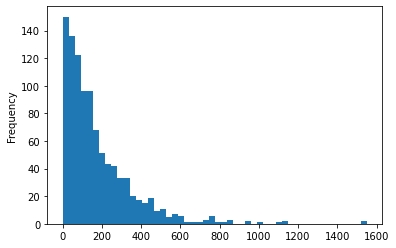

In [86]:
df_means2work['Public transportation'].plot.hist(bins=50)

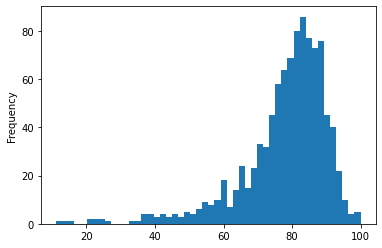

In [87]:
means2work['Percent Car, truck, or van'].plot.hist(bins=50)

Distrubution changes remain the same as expected.

<h2> Maps

Map related libraries. Uploading later to save for room and speed.

In [ ]:
import folium

In [156]:
import contextily as ctx

<h3>Transportation Means to Work

Basic Plot

In [ ]:
means2work.plot(figsize=(20,15))

Choropleth Maps

In [ ]:
means2work.plot(figsize=(20,15),
                 column='Percent Drove alone',
                 legend=True, 
                 scheme='NaturalBreaks')


In [ ]:
# create the 1x2 subplots
fig, axs = plt.subplots(1, 2, figsize=(15, 15))

# name each subplot
ax1, ax2 = axs

# regular count map on the left
means2work.plot(column='Percent Car, truck, or van', 
            scheme='Quantiles',
            k=5, 
            edgecolor='white', 
            linewidth=0., 
            alpha=0.75, 
            ax=ax1, # this assigns the map to the subplot,
            legend=True
           )

ax1.axis("off")
ax1.set_title("Percent Car, truck, or van")

# spatial lag map on the right
means2work.plot(column='Percent Public transportation', 
            scheme='Quantiles',
            k=5, 
            edgecolor='white', 
            linewidth=0., 
            alpha=0.75, 
            ax=ax2, # this assigns the map to the subplot
            legend=True
           )

ax2.axis("off")
ax2.set_title("Percent Public transportation")

Plotting w/ contextuality 

In [ ]:
ax=means2work.plot(figsize=(20,15),
                 column='Percent Bus',
                 cmap='cividis',
                   legend=True, 
                 scheme='NaturalBreaks')

ctx.add_basemap(ax, crs=means2work.crs.to_string())

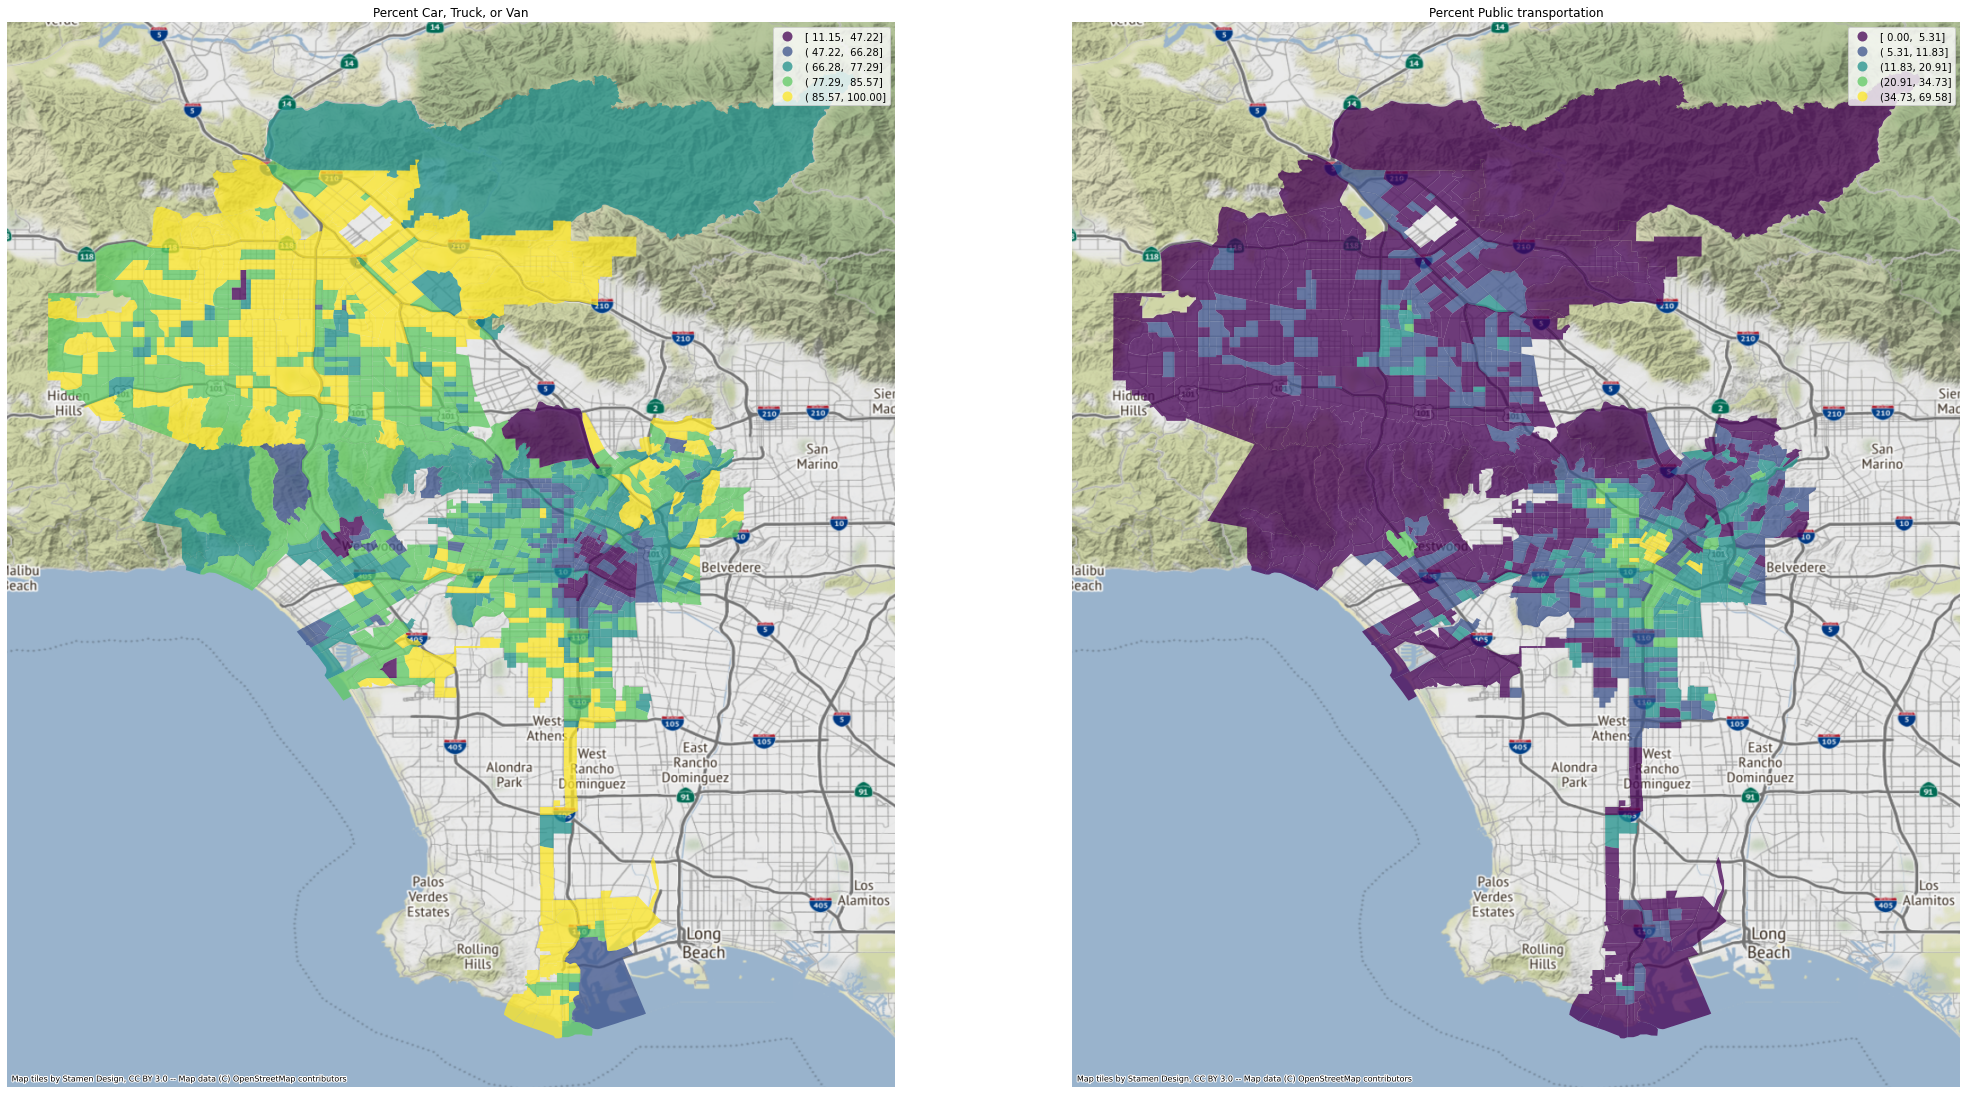

In [157]:
# create the 1x2 subplots
fig, axs = plt.subplots(1, 2, figsize=(35, 35))

# name each subplot
ax1, ax2 = axs

# regular count map on the left
means2work.plot(column='Percent Car, truck, or van', 
            scheme='NaturalBreaks',
            k=5, 
            edgecolor='white', 
            linewidth=0., 
            alpha=0.75, 
            ax=ax1, # this assigns the map to the subplot,
            legend=True
           )

ax1.axis("off")
ax1.set_title("Percent Car, Truck, or Van")

# spatial lag map on the right
means2work.plot(column='Percent Public transportation', 
            scheme='NaturalBreaks',
            k=5,  
            edgecolor='white', 
            linewidth=0., 
            alpha=0.75, 
            ax=ax2, # this assigns the map to the subplot
            legend=True
           )

ax2.axis("off")
ax2.set_title("Percent Public transportation")

ctx.add_basemap(ax1, crs=means2work.crs.to_string())
ctx.add_basemap(ax2, crs=means2work.crs.to_string())

Plotting with Folium (in process)

In [ ]:
latitude = 34.00158291566265

In [ ]:
longitude = -118.251045313253



#not working yet
m_m2w = folium.Map()
m_m2w = folium.Map(location=[latitude,longitude], zoom_start=10)

m_m2w.choropleth(geo_data= 'means2work', data='means2work', key_on='means2work',
             columns=['Percent Public transportation'], fill_color='BuPu')



#not working yet

m_m2w = folium.Map()
m_m2w = folium.Map(location=[latitude,longitude], zoom_start=10)
m_m2w

folium.Choropleth(
                  geo_data=means2work,
                  data=means2work,           
                  column=['Percent Public transportation'],
                  fill_color='BuPu',
                  line_weight=0.1, 
                  fill_opacity=0.8,
                  line_opacity=0.2, 
                  legend_name='Test)').add_to(m_m2w)    
m_m2w

<h3> Income

In [ ]:
gdf_income.head(100).plot(figsize=(10,10),column='Median Income',legend=True)

In [ ]:
gdf_income.plot(figsize=(12,10),
                 column='Median Income',
                 legend=True, 
                 scheme='NaturalBreaks')

In [ ]:
gdf_income.plot(figsize=(12,10),
                 column='Median Income',
                 legend=True, 
                 scheme='equal_interval')

In [ ]:
gdf_income.plot(figsize=(12,10),
                 column='Median Income',
                 legend=True, 
                 scheme='quantiles')

In [ ]:
# create the 1x2 subplots
fig, axs = plt.subplots(1, 2, figsize=(15, 12))

# name each subplot
ax1, ax2 = axs

# regular count map on the left
gdf_income.plot(column='Median Income', 
            cmap='RdYlGn_r', 
            scheme='quantiles',
            k=5, 
            edgecolor='white', 
            linewidth=0., 
            alpha=0.75, 
            ax=ax1, # this assigns the map to the subplot,
            legend=True
           )

ax1.axis("off")
ax1.set_title("Median Income")

# spatial lag map on the right
gdf_income.plot(column='Median Income', 
            cmap='RdYlGn_r', 
            scheme='quantiles',
            k=5, 
            edgecolor='white', 
            linewidth=0., 
            alpha=0.75, 
            ax=ax2, # this assigns the map to the subplot
            legend=True
           )
ax2.axis("off")
ax2.set_title("Median Income")

<h3> Race and Ethnicity

In [ ]:
gdf_race.head(100).plot(figsize=(10,10),column='N_White',legend=True)


In [ ]:
gdf_race.plot(figsize=(12,10),
                 column='N_Black',
                 legend=True, 
                 scheme='NaturalBreaks')

In [ ]:
gdf_race.plot(figsize=(12,10),
                 column='N_Black',
                 legend=True, 
                 scheme='equal_interval')

In [ ]:
gdf_race.plot(figsize=(12,10),
                 column='N_Black',
                 legend=True, 
                 scheme='quantiles')


In [ ]:
# create the 1x2 subplots
fig, axs = plt.subplots(1, 2, figsize=(15, 12))

# name each subplot
ax1, ax2 = axs

# regular count map on the left
gdf_race.plot(column='N_Black', 
            cmap='RdYlGn_r', 
            scheme='quantiles',
            k=5, 
            edgecolor='white', 
            linewidth=0., 
            alpha=0.75, 
            ax=ax1, # this assigns the map to the subplot,
            legend=True
           )

ax1.axis("off")
ax1.set_title("N_Black")

# spatial lag map on the right
gdf_race.plot(column='N_White', 
            cmap='RdYlGn_r', 
            scheme='quantiles',
            k=5, 
            edgecolor='white', 
            linewidth=0., 
            alpha=0.75, 
            ax=ax2, # this assigns the map to the subplot
            legend=True
           )

ax2.axis("off")
ax2.set_title("N_White")

Links for other maps to check out

1. https://www.analyticsvidhya.com/blog/2020/06/guide-geospatial-analysis-folium-python/
2. [How to plot several layers using GeoPandas](https://stackoverflow.com/questions/57773092/how-to-plot-several-layers-using-geopandas)
3. [How do I add two choropleth layers in folium and have them act like a feature group?](https://stackoverflow.com/questions/55196978/how-do-i-add-two-choropleth-layers-in-folium-and-have-them-act-like-a-feature-gr)


In [ ]:
local_cbd.plot(column='VAR_ROUTE',
            linewidth=1., 
            alpha=0.75, 
            legend=True
           )

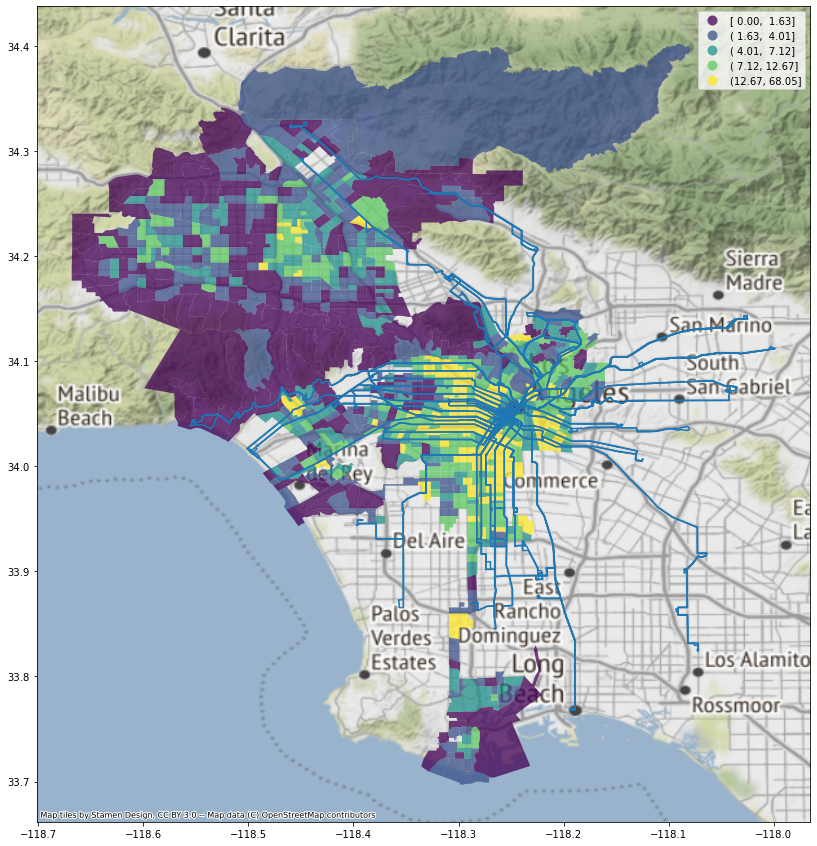

In [171]:
# create the 1x2 subplots
fig, ax = plt.subplots(figsize=(15, 15))

# name each subplot

# regular count map on the left
means2work.plot(column='Percent Bus', 
            scheme='Quantiles',
            k=5, 
            linewidth=0., 
            alpha=0.75, 
            ax=ax,
            legend=True
           )

# spatial lag map on the right
local_cbd.plot(ax=ax)


ctx.add_basemap(ax,crs=means2work.crs.to_string())

In [ ]:
#urL of json
url = ("https://s3-us-west-2.amazonaws.com/mappingla.com/downloads/neighborhoods/la_city.json?_ga=2.139738288.2039375190.1612206973-775419131.1602133353"
)
#defining nbhoods, with json from url
nbhoods = f"{url}/la_city.json"

#used the lat and long from above-could use generic LA points
#tiles: openstreetmap
m_nbhoods = folium.Map(
    location=[34.00158291566265, -118.251045313253],
    tiles='cartodbpositron',
    zoom_start=10,     #tiles: openstreetmap, stamentoner, cartodbpositron, cartodbdark_matter
)

#add to folium
folium.GeoJson(nbhoods, name="geojson").add_to(m_nbhoods)



m_nbhoods